In [1]:
from importlib import reload
from slr import historical

In [39]:
from slr import slrprojections
from slr import utils
from slr import visualize
reload(visualize)
reload(historical)
reload(slrprojections)
reload(utils)
import matplotlib.pyplot as plt
import pandas as pd

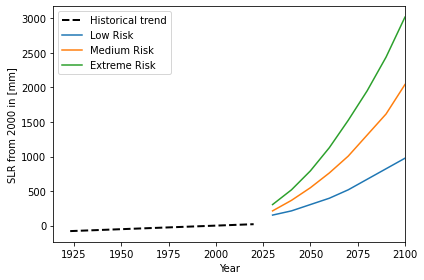

In [42]:
visualize.HistoricalVsProjections(location=1)
plt.tight_layout()

In [47]:
utils._validate_location(location=0)

'9414290'

In [13]:
slrprojections.SLRProjections.from_location(location="9419750")

Sea level rise Projections for Crescent City, CA issued by California OPC 2018; there are 3 Scenario(s) available.

In [16]:
sf = slrprojections.SLRProjections.from_location(location="9419750")
sf.convert(to_units='mm', inplace=True)

,"Low Risk, 83.00% [mm]","Medium Risk, 99.50% [mm]","Extreme Risk, nan% [mm]"
Year (baseline: 2000),,,
2030,91.435538,152.392563,243.828101
2040,121.914051,274.306614,426.699177
2050,213.349589,457.177690,701.005791
2060,274.306614,640.048766,1005.790917
2070,365.742152,853.398354,1371.533069
2080,487.656202,1127.704968,1798.232246
2090,609.570253,1432.490094,2255.409936
2100,761.962816,1798.232246,2834.501676
2110,761.962816,1889.667784,3352.636391


In [17]:
hs = historical.HistoricalSLR.from_slrprojections(slrprojections=sf)

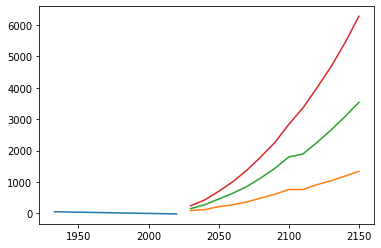

In [18]:
# Build a linear trend as simpy as possible from the historical payload
fig, ax = plt.subplots(1, 1)
ax.plot(hs.timeseries.index.year, hs.timeseries.values)
for scenario_ in sf.scenarios:
    ax.plot(
        scenario_.data.x,
        scenario_.data.y
    )